In [1]:
import nibabel as nb
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
seg_baseline_filename = '/home/paul/lcn/20230918-bloodstream-r/fs-subs/sub-PS50/pet1/apas.nii.gz'
dvr_baseline_filename = '/home/paul/lcn/20230918-bloodstream-r/fs-subs/sub-PS50/pet1/glmfit.logan/dvr/gamma.nii.gz'
seg_blocked_filename = '/home/paul/lcn/20230918-bloodstream-r/fs-subs/sub-PS50/pet2/apas.nii.gz'
dvr_blocked_filename = '/home/paul/lcn/20230918-bloodstream-r/fs-subs/sub-PS50/pet2/glmfit.logan/dvr/gamma.nii.gz'
merge_filename = '/home/paul/lcn/git/miba/occupancy-merge.json'

In [3]:
seg_baseline = nb.load(seg_baseline_filename)
dvr_baseline = nb.load(dvr_baseline_filename)
seg_blocked = nb.load(seg_blocked_filename)
dvr_blocked = nb.load(dvr_blocked_filename)
with open(merge_filename) as f:
    merge_data = json.load(f)

In [4]:
seg_baseline_voxels = nb.casting.float_to_int(seg_baseline.dataobj, np.int16)
dvr_baseline_voxels = np.array(dvr_baseline.dataobj)
seg_blocked_voxels = nb.casting.float_to_int(seg_blocked.dataobj, np.int16)
dvr_blocked_voxels = np.array(dvr_blocked.dataobj)

In [65]:
#be_verbose = True
be_verbose = False

baseline_vals = []
blocked_vals = []
regions = []

for region in merge_data['regions']:
    mask_baseline = np.isin(seg_baseline_voxels, merge_data['regions'][region]['labels'])
    mask_blocked = np.isin(seg_blocked_voxels, merge_data['regions'][region]['labels'])
    if be_verbose:
        print(region)
        print(merge_data['regions'][region]['labels'])
        print(np.count_nonzero(mask_baseline))
        print(np.count_nonzero(mask_blocked))
    regions.append(region)
    baseline_vals.append(np.mean(dvr_baseline_voxels[mask_baseline]))
    blocked_vals.append(np.mean(dvr_blocked_voxels[mask_blocked]))
    
baseline_minus_blocked_vals = (np.array(baseline_vals) - np.array(blocked_vals)).tolist()

In [66]:
len(baseline_vals)

13

In [67]:
len(blocked_vals)

13

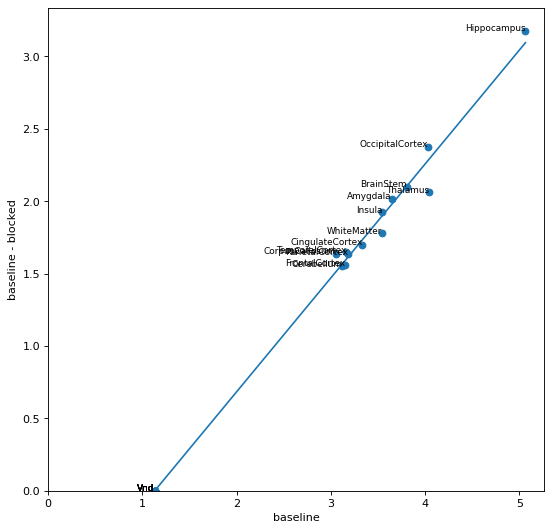

In [75]:
label_datapoints = True
#label_datapoints = False

x = baseline_vals
y = baseline_minus_blocked_vals

slope, intercept = np.polyfit(x, y, 1)
p1d = np.poly1d([slope, intercept])
Vnd = -1 * intercept / slope
occupancy = slope
x.append(Vnd)
y.append(0)
regions.append('Vnd')

fig = plt.figure(figsize=(8, 8), dpi=150, facecolor='white')
plt.scatter(x, y)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.xlabel('baseline')
plt.ylabel('baseline - blocked')

plt.plot(np.unique(x), p1d(np.unique(x)))
if label_datapoints: [plt.text(i, j, f'{region}', fontsize=8, ha='right') for (i, j, region) in zip(x, y, regions)]
plt.savefig('test.png', facecolor=fig.get_facecolor())

In [56]:
intercept

-0.8908032988337925

In [51]:
slope

0.7869642451826336

In [52]:
x_intercept = -1 * intercept / slope

In [53]:
x_intercept

1.1319488836841127

In [76]:
str(baseline_vals)

'[3.1544476, 3.3334477, 3.1607227, 4.0344615, 3.186374, 5.063432, 3.6439748, 4.042804, 3.0504262, 3.5442677, 3.120665, 3.8035932, 3.5473096, 1.1319488995826497, 1.13194889958265, 1.1319488995826499, 1.1319488995826497, 1.1319488995826503, 1.1319488995826492, 1.13194889958265, 1.1319488995826494]'